#📌 Extracción

In [199]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

### Convertimos las tablas anidadas en DF separados para luegos unirlos con concat

In [201]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [202]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_nuevo = df[['customerID','Churn']]
df_nuevo = pd.concat([df_nuevo,df_customer,df_phone,df_account], axis=1)

df_nuevo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [203]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 795.0+ KB


In [204]:
df_nuevo.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6785,9362-MWODR,No,Female,0,No,Yes,40,Yes,No,Month-to-month,Yes,Credit card (automatic),64.10,2460.35
6998,9637-CDTKZ,No,Male,0,Yes,No,72,Yes,Yes,Two year,Yes,Credit card (automatic),114.10,8086.4
1507,2167-FQSTQ,No,Female,0,Yes,No,72,Yes,Yes,Two year,Yes,Electronic check,92.40,6786.1
3139,4374-YMUSQ,No,Male,0,No,No,34,Yes,Yes,One year,No,Credit card (automatic),116.25,3899.05
204,0314-TKOSI,No,Female,0,No,No,6,Yes,No,Month-to-month,No,Mailed check,55.15,322.9
5759,7869-ZYDST,No,Male,0,Yes,No,31,Yes,Yes,Month-to-month,Yes,Credit card (automatic),59.05,1882.8
2244,3134-DSHVC,No,Female,0,No,No,63,Yes,Yes,Two year,No,Credit card (automatic),98.00,6218.45
2350,3276-HDUEG,Yes,Female,0,No,No,1,Yes,Yes,Month-to-month,Yes,Mailed check,75.05,75.05
1964,2790-XUYMV,No,Male,0,No,Yes,71,Yes,Yes,One year,Yes,Credit card (automatic),85.45,6028.95
1801,2568-BRGYX,Yes,Male,0,No,No,4,Yes,No,Month-to-month,Yes,Electronic check,70.20,237.95


In [205]:
df_nuevo['Churn'] = df_nuevo['Churn'].replace('', 'no').str.upper()
df_nuevo['Churn'].unique()

array(['NO', 'YES'], dtype=object)

In [206]:
df_nuevo['gender'] = df_nuevo['gender'].str.upper()
df_nuevo['gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [207]:
df_nuevo['SeniorCitizen'].unique()

array([0, 1])

In [208]:
df_nuevo['Partner'] = df_nuevo['Partner'].str.upper()
df_nuevo['Partner'].unique()

array(['YES', 'NO'], dtype=object)

In [209]:
df_nuevo['Dependents'] = df_nuevo['Dependents'].str.upper()
df_nuevo['Dependents'].unique()

array(['YES', 'NO'], dtype=object)

In [210]:
df_nuevo['PhoneService'] = df_nuevo['PhoneService'].str.upper()
df_nuevo['PhoneService'].unique()

array(['YES', 'NO'], dtype=object)

In [211]:
df_nuevo['MultipleLines'] = df_nuevo['MultipleLines'].str.upper()
df_nuevo['MultipleLines'].unique()

array(['NO', 'YES', 'NO PHONE SERVICE'], dtype=object)

In [212]:
df_nuevo['Contract'] = df_nuevo['Contract'].str.upper()
df_nuevo['Contract'].unique()

array(['ONE YEAR', 'MONTH-TO-MONTH', 'TWO YEAR'], dtype=object)

In [213]:
df_nuevo['PaperlessBilling'] = df_nuevo['PaperlessBilling'].str.upper()
df_nuevo['PaperlessBilling'].unique()

array(['YES', 'NO'], dtype=object)

In [214]:
df_nuevo['PaymentMethod'] = df_nuevo['PaymentMethod'].replace('', 'no').str.upper()
df_nuevo['PaymentMethod'].unique()

array(['MAILED CHECK', 'ELECTRONIC CHECK', 'CREDIT CARD (AUTOMATIC)',
       'BANK TRANSFER (AUTOMATIC)'], dtype=object)

In [215]:
df_nuevo['Charges.Total'] = df_nuevo['Charges.Total'].map(lambda x : x.replace('$' , '').replace(',' , '').strip())
df_nuevo['Charges.Total'] = pd.to_numeric(df_nuevo['Charges.Total'], errors='coerce').astype(np.float64)
df_nuevo.fillna({'Charges.Total': 0}, inplace=True)# filtra los nulos y en la columna charges.total le asigna un 0 , con implace lo remplaza en todo el data frame
nulos = df_nuevo['Charges.Total'].isnull().sum()# sumamos y verificamos nulos
int(nulos)

0

In [216]:
#Creamos columna 'Cuentas_Diarias' que es el valor diario del valor del mes
df_nuevo['Charges.Days'] = (df_nuevo['Charges.Monthly']/30).round(1)

#📊 Carga y análisis

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica:

*'NO', 'YES', 'NO PHONE SERVICE'*

- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato :

*'ONE YEAR', 'MONTH-TO-MONTH', 'TWO YEAR'*

- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago:

*'MAILED CHECK', 'ELECTRONIC CHECK', 'CREDIT CARD (AUTOMATIC)',
       'BANK TRANSFER (AUTOMATIC)'*

- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente
- `Charges.Days`: total de todos los servicios del cliente por dia

In [217]:
df_nuevo.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Days
0,0002-ORFBO,NO,FEMALE,0,YES,YES,9,YES,NO,ONE YEAR,YES,MAILED CHECK,65.6,593.30,2.2
1,0003-MKNFE,NO,MALE,0,NO,NO,9,YES,YES,MONTH-TO-MONTH,NO,MAILED CHECK,59.9,542.40,2.0
2,0004-TLHLJ,YES,MALE,0,NO,NO,4,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.9,280.85,2.5
3,0011-IGKFF,YES,MALE,1,YES,NO,13,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.0,1237.85,3.3
4,0013-EXCHZ,YES,FEMALE,1,YES,NO,3,YES,NO,MONTH-TO-MONTH,YES,MAILED CHECK,83.9,267.40,2.8


# Analisis descriptivo :

In [218]:
df_nuevo[['Charges.Monthly','Charges.Total','Charges.Days']].describe().round(1)

,Charges.Monthly,Charges.Total,Charges.Days
count,7267.0,7267.0,7267.0
mean,64.7,2277.2,2.2
std,30.1,2268.6,1.0
min,18.2,0.0,0.6
25%,35.4,396.2,1.2
50%,70.3,1389.2,2.3
75%,89.9,3778.5,3.0
max,118.8,8684.8,4.0


# Distribución de evasión:

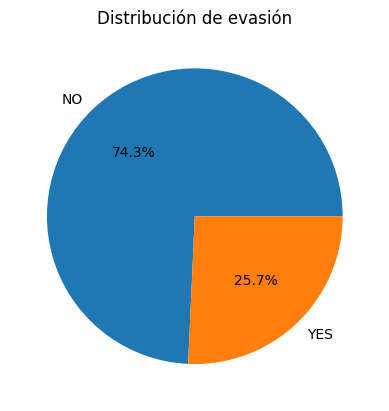

In [219]:
import matplotlib.pyplot as plt



Churn_labels = list(df_nuevo['Churn'].unique())
sizes = [int((df_nuevo['Churn'] == 'NO').sum()),int((df_nuevo['Churn'] == 'YES').sum())]
fig, ax = plt.subplots()
ax.pie(sizes, labels=Churn_labels, autopct='%1.1f%%')
ax.set_title('Distribución de evasión')
plt.show()

# Conteo de evasión por variables numéricas:

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [220]:
df_evacion = df_nuevo.groupby(['tenure','Churn'])['Charges.Total'].mean().round(1).reset_index() # el reset index crea un index y tambien convierte la serie calculada en un df.
df_evacion = df_evacion.drop(index=0).reset_index(drop=True)



In [221]:
df_evacion_YES = df_evacion.query('Churn == "YES"')
df_evacion_YES = df_evacion_YES[['tenure','Charges.Total']]
df_evacion_YES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         72 non-null     int64  
 1   Charges.Total  72 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [222]:
df_evacion_NO = df_evacion.query('Churn == "NO"')
df_evacion_NO = df_evacion_NO[['tenure','Charges.Total']]
df_evacion_NO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 142
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         72 non-null     int64  
 1   Charges.Total  72 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


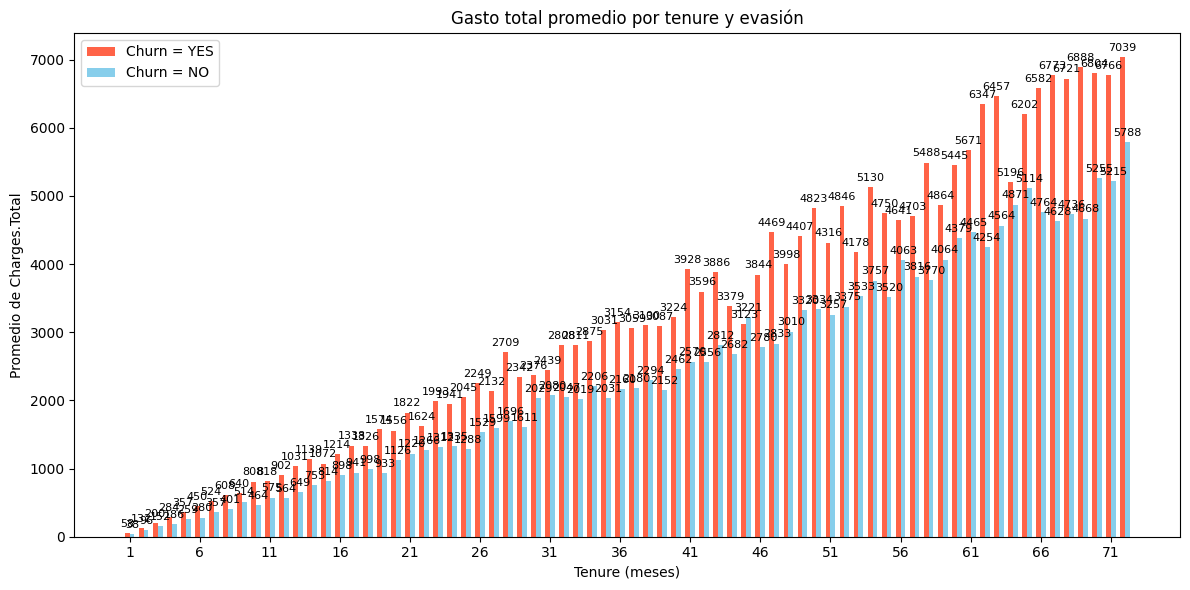

In [223]:

tenure = df_evacion_YES['tenure'].tolist()
charges_yes = df_evacion_YES['Charges.Total'].tolist()
charges_no = df_evacion_NO['Charges.Total'].tolist()

x = np.arange(len(tenure))  # posiciones para las barras
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.bar(x - width/2, charges_yes, width, label='Churn = YES', color='tomato')
bars2 = ax.bar(x + width/2, charges_no, width, label='Churn = NO', color='skyblue')

# Etiquetas y título
ax.set_xlabel('Tenure (meses)')
ax.set_ylabel('Promedio de Charges.Total')
ax.set_title('Gasto total promedio por tenure y evasión')
ax.legend()

# Mostrar etiquetas sobre las barras
ax.bar_label(bars1, padding=3, fontsize=8, fmt='%.0f')
ax.bar_label(bars2, padding=3, fontsize=8, fmt='%.0f')

# Mostrar etiquetas del eje X cada 5 posiciones
ticks_cada_5 = x[::5]
labels_cada_5 = [tenure[i] for i in range(0, len(tenure), 5)]
ax.set_xticks(ticks_cada_5)
ax.set_xticklabels(labels_cada_5)

plt.tight_layout()
plt.show()





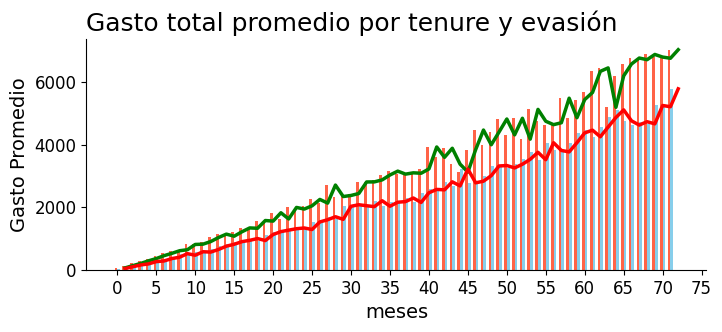

In [228]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(tenure,charges_yes,lw=2.5,color='g') #,marker='o')
ax.plot(tenure,charges_no,lw=2.5,color='r') #,marker='o')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Gasto total promedio por tenure y evasión', fontsize=18, loc='left')
ax.set_xlabel('meses',fontsize=14)
ax.set_ylabel('Gasto Promedio',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()

#📄Informe final